# <b>항공사 데이터 분석 (2022.02.24) </b>

### kaggle, dacon 링크
- [kaggle](https://www.kaggle.com/firuzjuraev/airlines-customer-satisfaction-classification)
- [dacon](https://dacon.io/competitions/official/235871/overview/description)

<br>

### GDSC ML study 발표
- 발표날짜 : 2022.02.24 목

<br>

### 데이터 분석 과정 요약 및 목차

1. 라이브러리 설치 및 데이터 읽기
2. 데이터 구조 훑어보기
  - 각 데이터 컬럼의 데이터 타입과 값들 확인
  - 데이터의 분포도 확인
4. 데이터 탐색과 시각화
  - 지리적 데이터 시각화(삼전도 scatter plot, 상관 관계 조사, 특성 조합 실험)
5. 데이터 준비
  - 데이터 정제(결측치 fill)
  - 텍스트/범주형 데이터
6. 테스트 세트 만들기
  - 검증 세트
7. 모델 생성 및 훈련
8. 모델 평가 

<br><br>


# <b>데이터 불러오기, 데이터 구조 확인</b>

### 라이브러리 설치

In [1]:
!pip install seaborn
!pip install catboost # baseline model Classifier
!pip install shap     # explainable ML

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # splitting
import seaborn as sns # 데이터 시각화 (satisfatcion 여부에 따른 특성값 분포도 표현을 위한 violin plot)
from sklearn.preprocessing import MinMaxScaler # 데이터 정규화


from catboost import CatBoostClassifier  # Baseline 모델
import shap   # XAI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 10.2 MB/s 


### 데이터 읽기 및 구조 확인

In [2]:
# 데이터 읽기
data = pd.read_csv('Airline.csv')

# 데이터 속성 값 확인
data.head()

FileNotFoundError: ignored

<b> Features </b>

- <b>satisfaction</b> (target) : 만족 여부
- Gender : 성별
- Customer Type : Disloyal 또는 Loyal 고객
- Age : 나이
- Type of Travel : Business 또는 Personal Travel
- Class : 등급
- Flight Distance : 비행 거리
- Seat comfort : 좌석 만족도
- Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
- Food and drink : 식음료 만족도
- Gate location : 게이트 위치 만족도
- Inflight wifi service : 기내 와이파이 서비스 만족도
- Inflight entertainment : 기내 엔터테인먼트 만족도
- Online support : 온라인 지원 만족도
- Ease of Online booking : 온라인 예매 편리성 만족도
- On-board service : 탑승 서비스 만족도
- Leg room service : Leg room 서비스 만족도
- Baggage handling : 수하물 처리 만족도
- Checkin service : 체크인 서비스 만족도
- Cleanliness : 청결도 만족도
- Online boarding : 온라인보딩 만족도
- Departure Delay in Minutes : 출발 지연 시간
- Arrival Delay in Minutes : 도착 지연 시간
- target : 만족 여부

In [ ]:
# 데이터 구조 확인
data.info()

### 데이터 타입 및 수치 데이터 기초 통계량 확인
- object 타입: [satisfaction, Gender, Customer Type, Type of Travel, Class]



In [ ]:
# 기초 통계량 확인
data.describe()

In [ ]:
# 특성 값들의 종류 
data.nunique()

### 결측치 확인 및 텍스트 범주형 데이터 확인
- dacon에서 제공한 train(3000), test(2000)이 아닌 kaggle 원본 데이터를 사용하였기 떄문에 결측치 여부를 확인하고 결측치 값들을 어떻게 처리할지 결정하는 가공 과정 필요

In [ ]:
# 결측치 확인
data.isna().sum()

- 'Arrival Delay in Minutes' 특성에서 결측치 값 393개 확인

<br>


In [ ]:
# object 값들의 범주 확인

# 범주형 데이터 분리
categorical_feature = data.columns[data.dtypes=='object']

for i in range(len(categorical_feature)):
   print(data[categorical_feature[i]].value_counts(), end='\n\n')

# <b>데이터 탐색 및 시각화</b>
- 만족 여부(satisfied)와 다른 속성들이 어떠한 관계를 맺고 있는가? (관심을 가져보아야 할 중요한 예측 변수 탐색해보기)

<br>

### <b> 주어진 과제 </b>
1. 전체 데이터의 구조와 분포는 어떻게 되는가?
2. 고객의 만족 여부(satisfaction)와 관련 있는 특성들은 무엇인가? 중요하게 여겨야 할 특성 값을은 무엇인가?
3. 텍스트 범주형 데이터들은 어떻게 가공할 것인가? 결측치는 어떻게 처리할 것인가?
  - 원-핫 인코딩 
  - 인코딩을 사용하지 않아도 되는 모델 사용



### 히스토그램
- 전체 데이터 구조와 분포도 확인

tight_layout not applied: number of columns in subplot specifications must be multiples of one another.


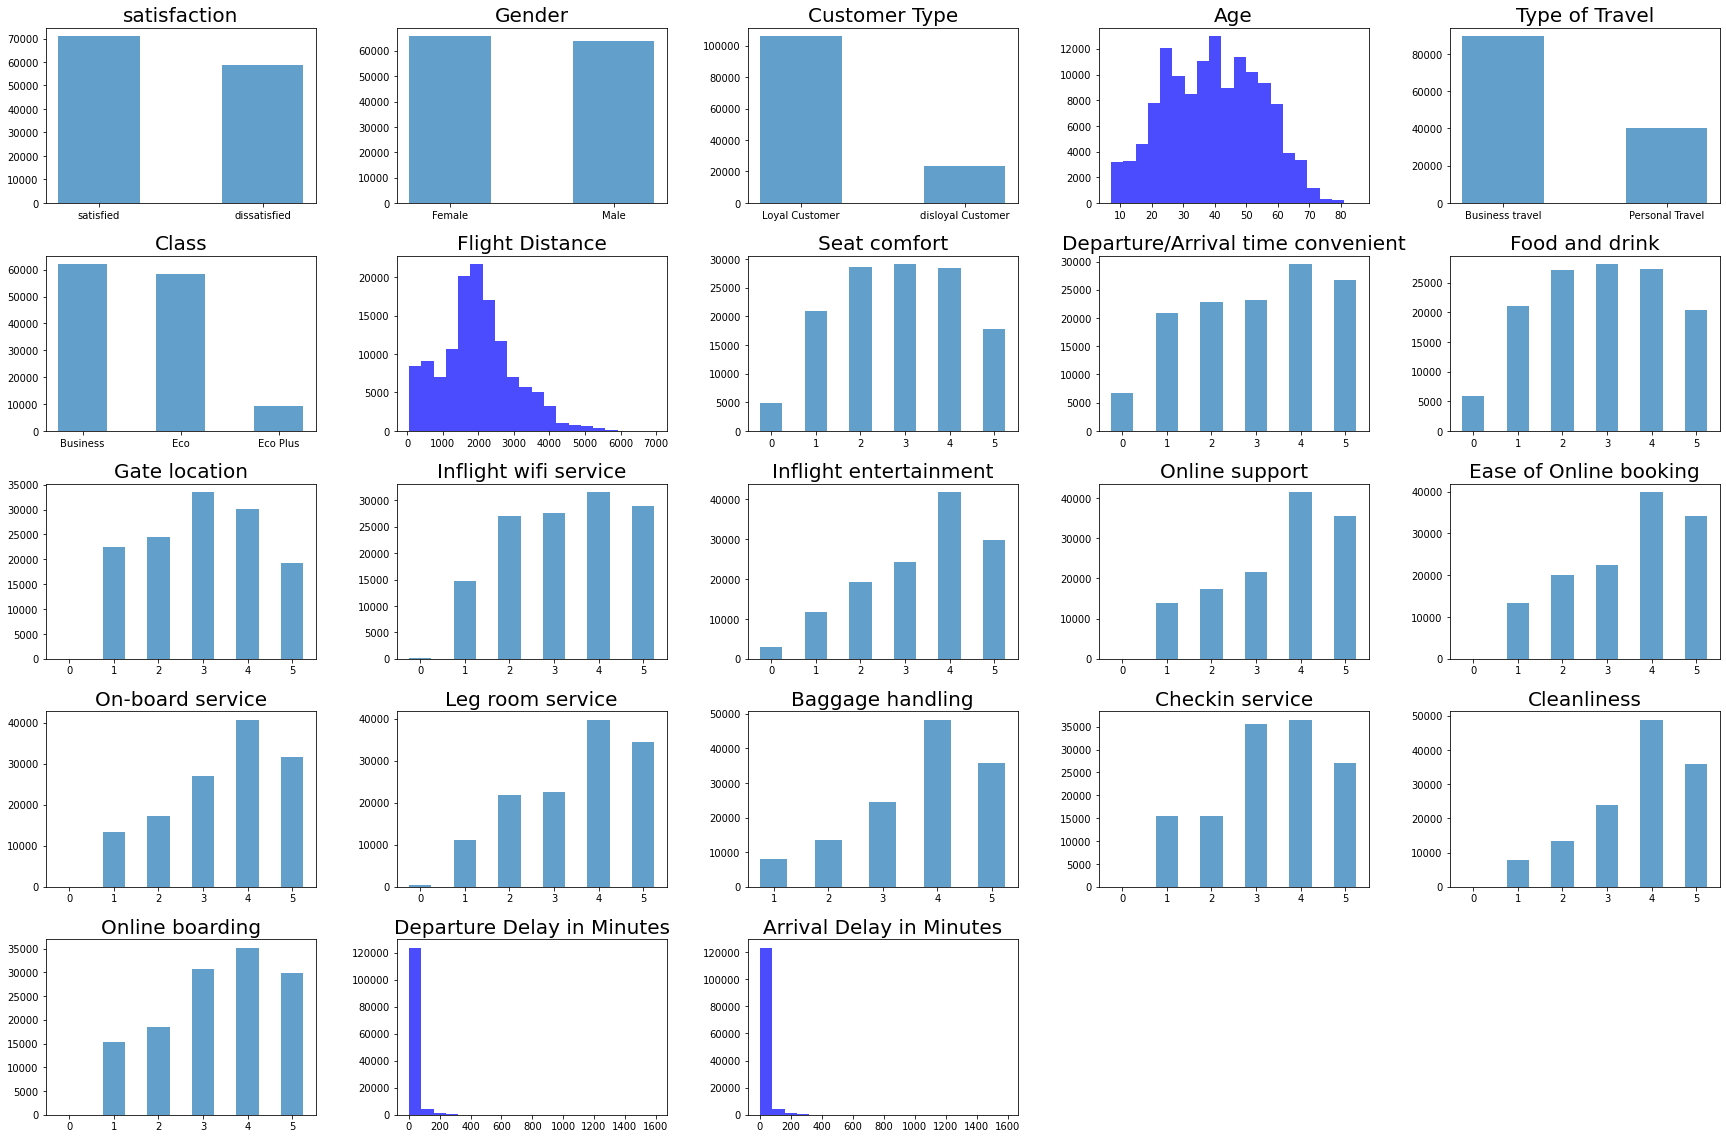

In [ ]:
# 히스토그램 그래프
data.hist(bins=50, figsize=(30,20))

cols = data.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)

    # 데이터 특성 값들의 종류가 20개 를 초과한다면 다르게 표시하기
    if len(data[cols[i]].unique()) > 20:
        plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = data[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Satisfaction (target) : 만족(satisfied : 1)이 조금 더 높은 정도
- Customer Type : 훨씬 많은 수의 Loyal Customer
- Age: 정규 분포 형태 (10~80 나잇대로 보임)
- Type Of Travel : Business > Personal Travel
- Class : Business > Eco > Eco Plus
- Seat Comfort : 0 ~ 5 사이의 값
- Departure/Arrival time comvinient, Departure/Arrival Delay in minutes
- Food and Drink
- Inflight with Wifi Service, Inflight entertainment
- Online Support, Ease of online booking, Online boarding
- On-board Service, Leg room service, Baggage Handling 
- Checkin Service
- Cleanliness

## 고객의 만족도와 특성들과의 관계 분석

#### 1. 텍스트 범주형 데이터
- violin graph 활용하여 텍스트 범주형 데이터들의 만족의 분포도 표현

In [ ]:
# satisfaction(target) 인코딩 (1: staisfied, 0: dissatisfied)

satisfaction_mapping = {"satisfied": 1, "dissatisfied": 0}
data['satisfaction'] = data['satisfaction'].map(satisfaction_mapping) 

In [ ]:
# 타겟 설정
target = "satisfaction"

# 범주형 데이터 분리
categorical_feature = data.columns[data.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle("Satisfaction ratio for text-data-categorical Features", fontsize=30)

# id는 제외하고 시각화합니다.
for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x= data[categorical_feature[i]], y= data[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### 범주형 데이터의 각 카테고리별 만족 분포도 확인 

- <b>Gender</b>: Female 고객이 Male보다 만족할 가능성이 높음
- <b>Customer Type</b>: Loyal 고객일 수록 만족 여부가 높음
- <b>Type of Travel</b>: Business Travel인 경우 만족에 불만족보다 많이 분포되어 있음
- <b>Class</b>: Business class의 좌석의 고객은 만족도 여부가 훨씬 높음, Eco와 EcoPlus는 만족보단 불만족에 조금 더 분포되어 있음

<br>

-> 다른 특성들과의 상관 관계 또한 조사해보도록 하자!

### 2.수치형 데이터
- 만족 여부에 대한 분포도 확인

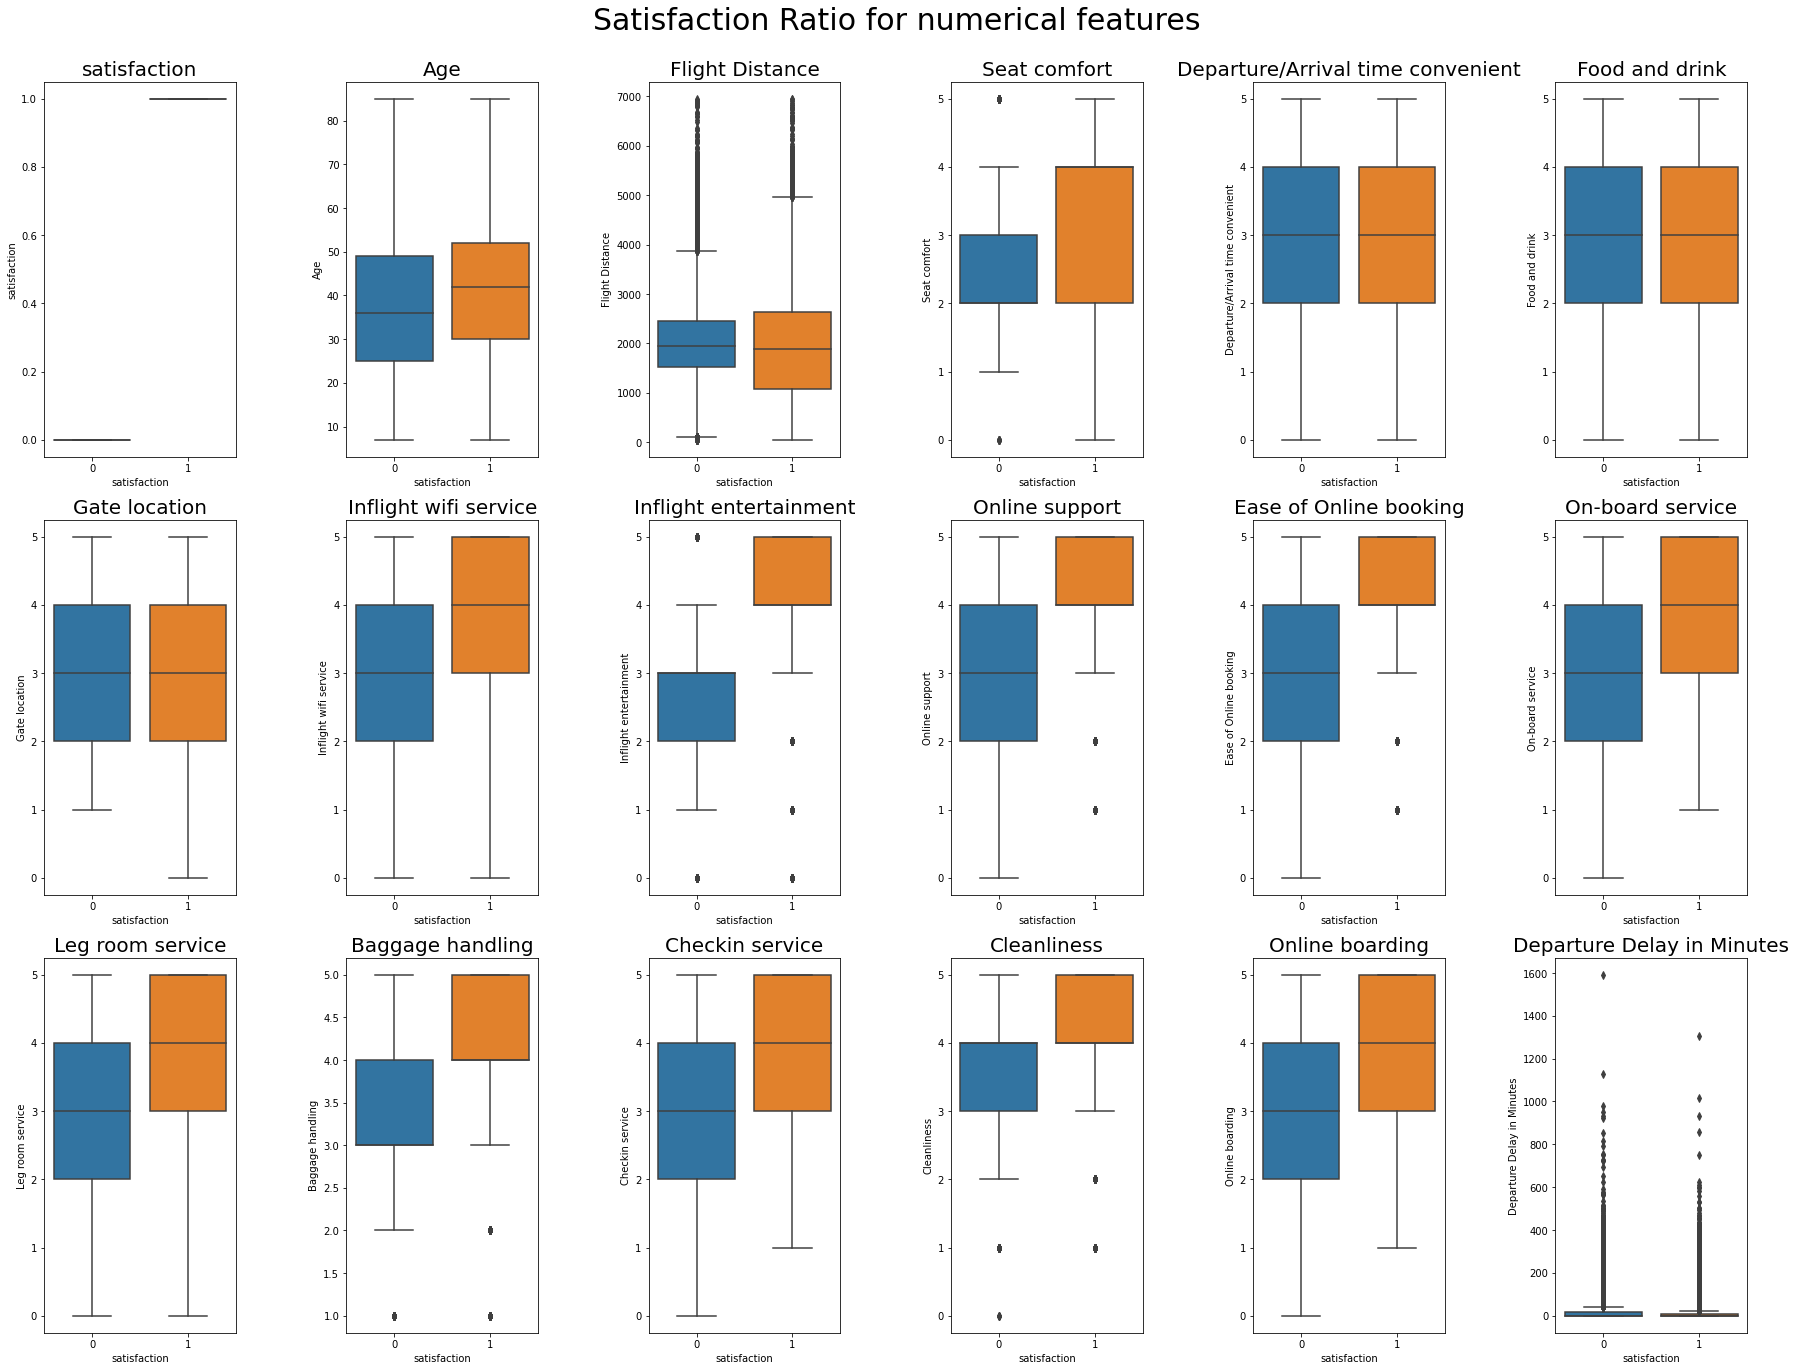

In [ ]:
# 수치형 데이터 분리
numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
num_data = data[numeric_feature]

# 박스플롯
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('Satisfaction Ratio for numerical features', fontsize= 30)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'satisfaction', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<b> 상관 관계 분석 </b>

- Age: 2~30 나잇대의 고객은 대체적으로 해당 나잇대 이상의 고객들 보다 불만족 point를 줄 가능성이 있음
- Flight Distance: 멀지 않은 거리를 이동하는 고객의 경우 satisfaction point를 줄 가능성 더 있음
<br>

만족 여부의 분포도 차이가 큰 예측 변수들
- , Inflight Entertainment, online support, ease of online bagage handling

<br>

분포도 차이의 큰 영향이 없는 요소들
- departure/arrival time convenient
- food and drink
- gate location

## 상관관계 조사

- 'satsifaction' 특성과 다른 수치형 특성들 간의 표준 상관 계수(standard correlation coefficient) 구하기

In [ ]:
corr_matrix = data.corr()

# 만족 여부(satisfaction-target) 다른 특성 사이의 상관간계 크기 
corr_matrix['satisfaction'].sort_values(ascending=False)

### 만족 여부의 상관 관계 분석

#### <b> satisfied </b> 와의 양의 상관 관계
- inflight entertainment (기내 오락) 이 가장 강한 양의 상관 관계를 보임
- 온라인 서비스: ease of online booking, online support
- 기내 서비스: on-board service, leg room service, cleanliness, seat comfort, infligt with wifi service, baggage handling
- class: eco보다는 business 좌석의 고객일 경우 만족도가 높음
- Type of Travel: Personal Travel인 경우가 Business인 경우보다는 만족도가 비교적 높음

<br><br>

#### 음의 관계
- Gender: 여자의 만족도가 더 높음을 확인 가능
- Customer Type: 

<br><br>

#### 크게 영향을 미치지 않는 요소들
- Food and Drink, Age, Gate Location
- Departure/Arrival time convenient, Flight Distance
- Arrival/Departure Delay in Minutes

<br><br>



In [ ]:
# 나이 (Age) 다른 특성 사이의 상관관계 크기 
corr_matrix['Age'].sort_values(ascending=False)

#### 나이의 상관 관계 분석
- Class : 약한 양의 관계이지만, Class와 관련이 깊다는 것을 알 수 있음
- Flight Distance: 어느정도 음의 관계를 보임. 비교적 나이가 많은 고객은 가까운 거리의 비행을 한다는 것을 추론 가능

<br><br>


In [ ]:
# 기내 오락 (Inflight Entertainment)과  다른 특성 사이의 상관간계 크기 
corr_matrix['Inflight entertainment'].sort_values(ascending=False)

### Inflight Entertainment과의 상관 관계 분석

만족 여부와 가장 큰 상관 관계를 보인 [Infight Entertainment]

- Online support                       0.441957
- Seat comfort                         0.426447
- Food and drink                       0.367669
- Online boarding                      0.355714
- Ease of Online booking               0.321731

<br>

- 만족 여부와 관련 있는 요소들과 모두 양의 관계
- Food and Drink는 만족 여부와 크게 관련 없었지만, Entertainment와는 크게 관련 있음을 추론 가능

<br><br>

-> 데이터 정제과정에서 인코딩 작업 후, 상관 관계를 더 자세하게 분석해도 좋을 것 같다. 


In [ ]:
# 표준 상관 계수 계산

corr_matrix = data.corr()

# Satisfaction (target) 에 따른 상관관계 
attributes = ['Age', 'Seat comfort', 'Flight Distance', 'Food and drink', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Checkin service', 'Leg room service', 'Cleanliness', 'Online boarding']
# scatter_matrix(data[attributes], figsize=(12,8))

# <b>데이터 정제</b>
1. 결측치 제거
2. 텍스트 형으로 범주가 나누어져 있는 특성 숫자로 바꾸어 인코딩 적용
3. 다른 속성 값들보다 비교적 값의 크기가 큰 데이터 정규화

## 1. 결측치 제거
- Arrival Delay in Minutes 특성에서 393개의 결측치 값 확인
- median 값으로 fill

In [ ]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())
data.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

<br><br>

## 2. 텍스트 범주의 속성 값들 인코딩

- Satisfaction(target) : satisfied(1), dissatisfied(0) -> 위에서 완료
- Type of Travel : Personal Travel(0), Business(!)
- Gender : Female(0), Male(1)
- Customer Type : Loyal(0), Disloyal(1)
- Class : Eco(1), Eco Plus(2), Business(3)

In [ ]:
# 기본 인코딩 함수

def encoding(col):
  col_encoded, col_categorizes = col.factorize()
  print(col_encoded[:30])
  print('카테고리들 : ', col_categorizes)
  return col_encoded

In [ ]:
data['satisfaction']

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129880, dtype: int64

In [ ]:
# Type of Travel 인코딩
data['Type of Travel'] = encoding(data['Type of Travel'])
data['Type of Travel']

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
카테고리들 :  Index(['Personal Travel', 'Business travel'], dtype='object')


0         0
1         0
2         0
3         0
4         0
         ..
129875    0
129876    0
129877    0
129878    0
129879    0
Name: Type of Travel, Length: 129880, dtype: int64

In [ ]:
# Gender 인코딩
data['Gender'] = encoding(data['Gender'])
data['Gender']

[0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0]
카테고리들 :  Index(['Female', 'Male'], dtype='object')


0         0
1         1
2         0
3         0
4         0
         ..
129875    0
129876    1
129877    1
129878    1
129879    0
Name: Gender, Length: 129880, dtype: int64

In [ ]:
# Customer Type 인코딩
data['Customer Type'] = encoding(data['Customer Type'])
data['Customer Type']

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
카테고리들 :  Index(['Loyal Customer', 'disloyal Customer'], dtype='object')


0         0
1         0
2         0
3         0
4         0
         ..
129875    1
129876    1
129877    1
129878    1
129879    1
Name: Customer Type, Length: 129880, dtype: int64

In [ ]:
# Class 인코딩

class_mapping = {"Eco": 1, "Eco Plus" : 2, "Business": 3}
data['Class'] = data['Class'].map(class_mapping)  

In [ ]:
data['Class']

0         1
1         3
2         1
3         1
4         1
         ..
129875    1
129876    3
129877    1
129878    1
129879    1
Name: Class, Length: 129880, dtype: int64

In [ ]:
data.info() # 모든 특성의 데이터 타입이 int형으로 변경된 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Gender                             129880 non-null  int64  
 2   Customer Type                      129880 non-null  int64  
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  int64  
 5   Class                              129880 non-null  int64  
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

<br><br>

### 인코딩 후 상관관계 분석 작업



In [ ]:
# Class와  다른 특성 사이의 상관간계 크기 

corr_matrix = data.corr()

corr_matrix['Class'].sort_values(ascending=False)

Class                                1.000000
Type of Travel                       0.545447
satisfaction                         0.305535
Inflight entertainment               0.241687
Online support                       0.177992
On-board service                     0.160818
Flight Distance                      0.156763
Age                                  0.140504
Checkin service                      0.129967
Ease of Online booking               0.128616
Leg room service                     0.125820
Baggage handling                     0.120381
Cleanliness                          0.114833
Online boarding                      0.097763
Inflight wifi service                0.061161
Food and drink                       0.049988
Gender                               0.005774
Gate location                       -0.004061
Departure Delay in Minutes          -0.009877
Arrival Delay in Minutes            -0.013974
Seat comfort                        -0.029539
Departure/Arrival time convenient 

- 높은 가격대의 좌석(Class)을 이용한 고객이 Business Travel을 할 경향이 큼을 추론
- Class가 높으므로, 만족도도 대체로 높은 편
- 역시나 inflight entertainment, online support, on-board service 높은편
= 높은 가격대의 좌석이 flight distance도 높은 경향을 띔, Age도 높을 가능성 큼

<br><br>

## 3. 특성 스케일링 (데이터 정규화 과정)
- min-max scaler을 이용하여 표준화

In [ ]:
data.describe()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.547328,0.492616,0.183092,39.427957,0.690584,2.029650,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.045465
std,0.497757,0.499947,0.386743,15.119360,0.462255,0.962636,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.416353
min,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,27.000000,0.000000,1.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,40.000000,1.000000,2.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,51.000000,1.000000,3.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,1.000000,1.000000,1.000000,85.000000,1.000000,3.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


- 

In [ ]:
# 분산이 큰 나이, 주행 거리, 시간 지연 특성의 값 정규화
num_features = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

scaler = MinMaxScaler()
data[num_features] = scaler.fit_transform(data[num_features]) 
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,0.743590,0,1,0.031155,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.000000,0.000000
1,1,1,0,0.512821,0,3,0.349804,0,0,0,3,0,2,2,3,4,4,4,2,3,2,0.194724,0.192551
2,1,0,0,0.102564,0,1,0.302565,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0.000000,0.000000
3,1,0,0,0.679487,0,1,0.083031,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.000000,0.000000
4,1,0,0,0.807692,0,1,0.044052,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1258a15110>,
      dtype=object)

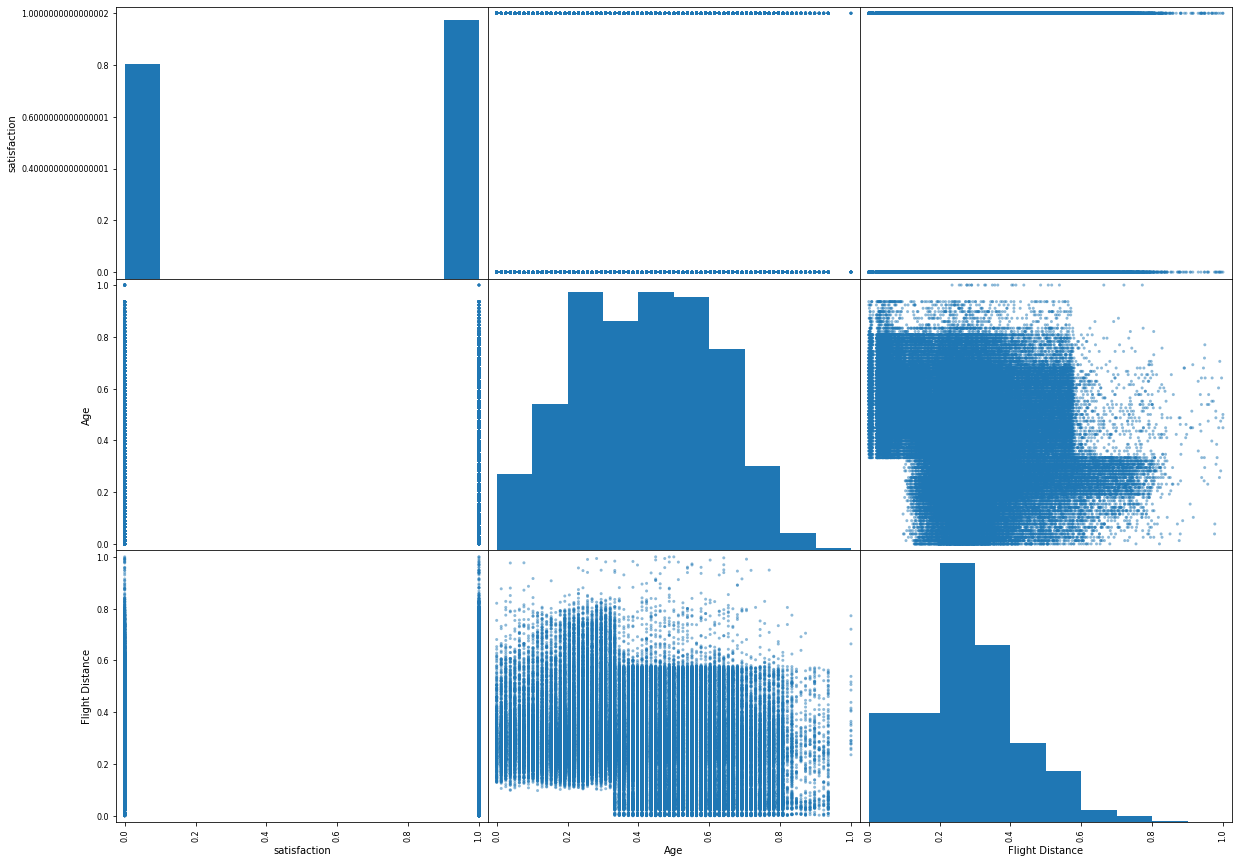

In [ ]:
# 산점도를 통해 만족도와 분산이 컸던 특성 값들의 관계 확인

# Satisfaction (target) 에 따른 상관관계 
attributes = ['satisfaction', 'Age', 'Flight Distance']
scatter_matrix(data[attributes], figsize=(20,15))

- Satisfaction에 대한 인사이트는 얻기 어려움 (Age와 Flight Distance와 애초에 큰 연관이 없었기 때문)
- 다만, 젊은 고객들이 더 먼 거리의 비행을 하는 경향으로 나타남

# <b>모델을 위한 데이터 준비</b>

- Test Set : Train data set의 20% 으로 준비
  - Validation 검증 Set 은 다시 train의 20%로 준비

In [ ]:
# 타깃 : 만족 여부
target = "satisfaction"

X = data.drop([target], axis=1) 
y = data[target]

### Tain, Test Set 분할

In [ ]:
SEED = 42 
TEST_SIZE = 0.2

# 만족도 여부(satsifiedL:1, dissatisfied:0)를 계층으로 train,test셋 4:1의 비율로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=SEED) 

### 검증 Validation Set 분할

In [ ]:
VAL_SIZE = 0.2

X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=VAL_SIZE, stratify=y_train, random_state=SEED)  

# <b>모델 생성 및 조절과 훈련, 평가</b>
- Baseline Model : catboost
  - 그래디언트 부스팅(gradient boosting) 경사하강법을 통해 가중치를 업데이트하면서 여러 개의 weak learner를 순차적으로 학습-예측하는 앙상블(ensemble) 학습 방식인 그래디언트 부스팅 알고리즘을 기반으로 하는 모델 


In [ ]:
# catboost Baseline 모델 생성 및 파라미터 조절

model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.3,
    custom_loss=['Accuracy'],
    eval_metric='Accuracy'
)

# 모델 훈련
model.fit(
    X_train, y_train,
    # cat_features=cat_features,
    eval_set=(X_val, y_val),
    logging_level='Silent',
    plot=True,
) 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### 모델 평가

In [ ]:
score = model.score(X_test, y_test)

print("모델 정확도 (test score): ", score)

모델 정확도 (test score):  0.9582691715429628


## Shap을 이용한 모델 정확도에 영향을 끼친 특성 값들 살펴보기
 
- Seat Comfort > Inflight entertainment > Customer Type > Ease of Online booking이 큰 영향을 준 것을 확인

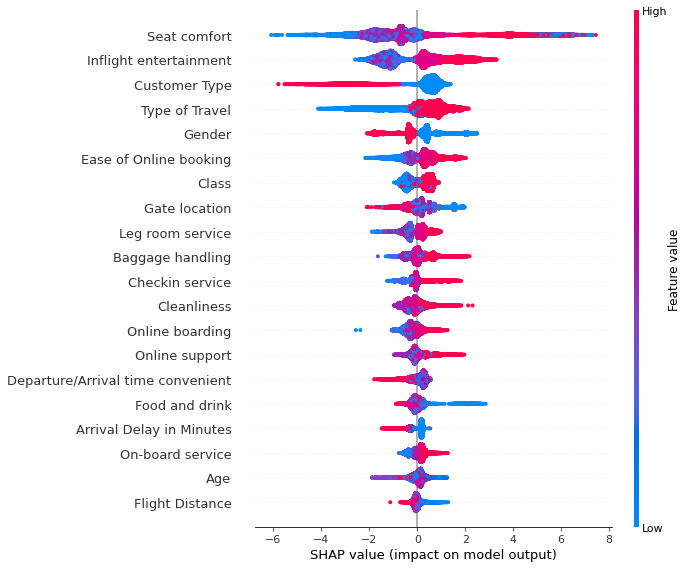

In [ ]:
explainer = shap.TreeExplainer(model)  
shap_values = explainer.shap_values(X_test)
base_value = explainer.expected_value
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

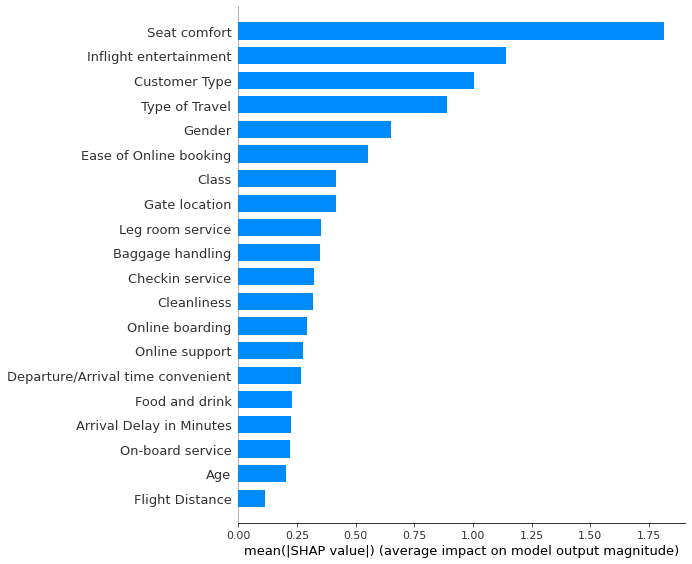

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type='bar')